In [2]:
import pandas as pd
import yfinance as yf 
import datetime
from datetime import date, timedelta
today = date.today()
import matplotlib.pyplot as plt
from mpl_finance import candlestick2_ohlc

In [3]:
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [4]:
data = yf.download('AAPL',start=start_date, end=end_date,progress=False)

In [5]:
data["Date"] = data.index

In [6]:
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]

In [7]:
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3443,2022-05-27,145.389999,149.679993,145.259995,149.639999,149.639999,90978500
3444,2022-05-31,149.070007,150.660004,146.839996,148.839996,148.839996,103718400
3445,2022-06-01,149.899994,151.740005,147.679993,148.710007,148.710007,74286600
3446,2022-06-02,147.830002,151.270004,146.860001,151.210007,151.210007,72348100
3447,2022-06-03,146.899994,147.970001,144.460007,145.380005,145.380005,88471400


## Candelstick

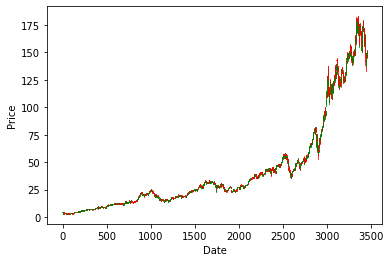

In [8]:
fig, ax = plt.subplots()
plt.xlabel("Date")
plt.ylabel("Price")

candlestick2_ohlc(ax, data.Open, data.High, data.Low, data.Close, width=1, colorup='g')
plt.savefig('my_figure.png')
plt.show()

In [9]:
correlation = data.corr()
correlation['Close'].sort_values(ascending=False)

Close        1.000000
Adj Close    0.999888
Low          0.999883
High         0.999876
Open         0.999754
Volume      -0.482142
Name: Close, dtype: float64

In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2008-09-24,4.545357,4.676786,4.469643,4.596786,3.930333,1047015200
1,2008-09-25,4.635714,4.813929,4.590000,4.711786,4.028662,1006045600
2,2008-09-26,4.461071,4.635714,4.392857,4.580000,3.915981,1126451200
3,2008-09-29,4.272143,4.274286,3.592500,3.759286,3.214257,2622057200
4,2008-09-30,3.866071,4.107143,3.796429,4.059286,3.470762,1626682400


In [11]:
X = data[["Open","High","Low","Volume"]]
y = data['Close']

In [12]:
X = X.to_numpy()
y = y.to_numpy()
y = y.reshape(-1,1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
from keras.models import Sequential

In [16]:
from keras.layers import Dense, LSTM

In [17]:
model = Sequential()

In [18]:
model.add(LSTM(128,return_sequences=True,input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=30)

Epoch 1/30
2758/2758 [==============================] - 7s 2ms/step - loss: 11.1269
Epoch 2/30
2758/2758 [==============================] - 6s 2ms/step - loss: 11.9287
Epoch 3/30
2758/2758 [==============================] - 5s 2ms/step - loss: 8.4294
Epoch 4/30
2758/2758 [==============================] - 6s 2ms/step - loss: 7.6617
Epoch 5/30
2758/2758 [==============================] - 6s 2ms/step - loss: 9.0684
Epoch 6/30
2758/2758 [==============================] - 6s 2ms/step - loss: 5.3224
Epoch 7/30
2758/2758 [==============================] - 6s 2ms/step - loss: 7.6332
Epoch 8/30
2758/2758 [==============================] - 6s 2ms/step - loss: 8.6396
Epoch 9/30
2758/2758 [==============================] - 6s 2ms/step - loss: 6.8195
Epoch 10/30
2758/2758 [==============================] - 6s 2ms/step - loss: 4.4103
Epoch 11/30
2758/2758 [==============================] - 6s 2ms/step - loss: 5.2118
Epoch 12/30
2758/2758 [==============================] - 6s 2ms/step - loss: 6.7055

In [21]:
import numpy as np
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

array([[175.90538]], dtype=float32)